# PROGRAMMING QUESTION

Question: How can you handle duplicate values in a dataset for a variable in Python using pandas?

Suppose, you are given the following dataset:

df = pd.read_csv('file.csv')

This dataset has many duplicate values. You need to identify them and also remove them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None
pd.options.display.max_rows=None

from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\Ankit\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('file.csv')
df.head()

,Gender,Educational_Qualifications,Demographics,Profit
0,M,PhD,Mumbai,99479.5
1,M,Graduate,Delhi,99467.0
2,M,Class X,NaN,61017.0
3,M,Class X,NaN,87964.0
4,M,PhD,NaN,99790.0


In [3]:
df.shape

(1090, 4)

In [4]:
df.isnull().sum()   #checking total null values in each of the feature

Gender                         81
Educational_Qualifications    148
Demographics                  985
Profit                         41
dtype: int64

In [5]:
df.dtypes  #first three columns have categorical data while the last has numerical data

Gender                         object
Educational_Qualifications     object
Demographics                   object
Profit                        float64
dtype: object

# 1.Gender Column

<AxesSubplot:xlabel='Gender', ylabel='count'>

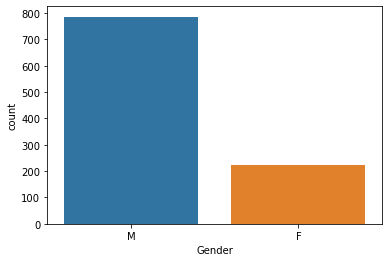

In [6]:
sns.countplot(df['Gender'])

In [7]:
df.Gender.value_counts()

M    786
F    223
Name: Gender, dtype: int64

In [8]:
df.Gender.value_counts()*100/len(df)

M    72.110092
F    20.458716
Name: Gender, dtype: float64

There are 72.11% males,20.45% females and the remaining are null values

Gender column is a categorical variable consisting of two classes male and female(binary class).

#### Null Value Treatment in Gender Column

In [9]:
df.Gender.isnull().sum()

81

In [10]:
df.Gender.isnull().sum()*100/len(df)

7.431192660550459

In [11]:
#there are 7.43% missing values in the Gender column

#### Imputation of Feature-Gender  

In [12]:
#imputation with mode-most frequenly occuring value(i.e Male)

In [13]:
df.Gender.mode()

0    M
dtype: object

In [14]:
df.isnull().sum()

Gender                         81
Educational_Qualifications    148
Demographics                  985
Profit                         41
dtype: int64

In [15]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [16]:
df['Gender'].isnull().sum()

0

In [17]:
#Now the gender column doesn't contain any null value

# 2.Educational Qualifications Column

<AxesSubplot:>

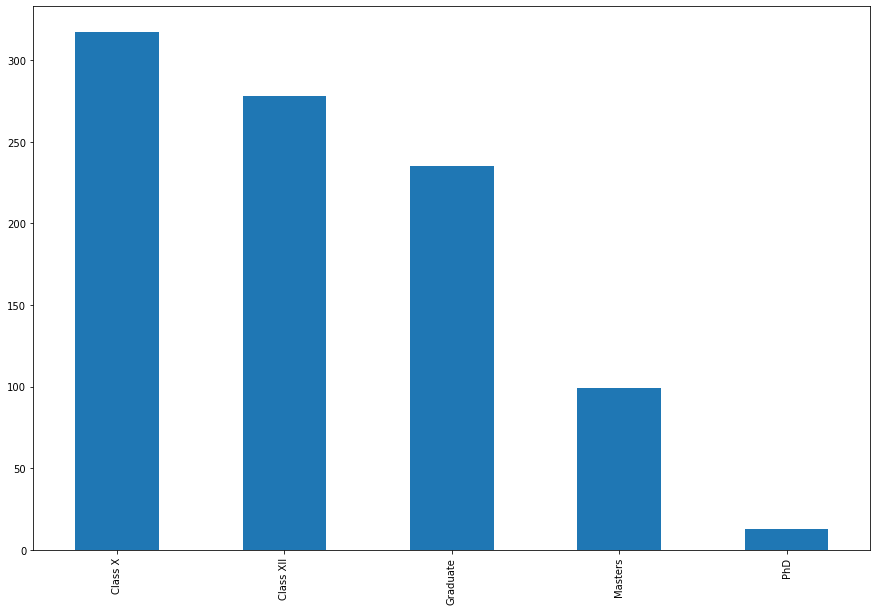

In [18]:
plt.figure(figsize=(15,10))
df['Educational_Qualifications'].value_counts(ascending=False).plot(kind="bar")

In [19]:
#we can see that class X have highest count while PhD has the lowest

In [20]:
df['Educational_Qualifications'].value_counts()

Class X      317
Class XII    278
Graduate     235
Masters       99
PhD           13
Name: Educational_Qualifications, dtype: int64

### Imputation of Educational Qualification

In [22]:
df.Educational_Qualifications.fillna("Others",inplace=True)

In [23]:
df.Educational_Qualifications.isnull().sum()

0

In [24]:
#now the column doesn't contain any null values

# 3.Demographics Column

In [25]:
df.Demographics.isnull().sum() #out of 1090 rows 985 rows have no data

985

In [26]:
df.Demographics.isnull().sum()*100/len(df)

90.36697247706422

In [27]:
#demographics data has 90.36% missing data which is huge in number and hence this wont be useful for any further analysis
#one can request for more data if this in an important feature required ahead 
#dropping the column
df.drop(['Demographics'],axis=1,inplace=True)

# 4.Profit Column

In [28]:
#This is a numerical column

<AxesSubplot:xlabel='Profit'>

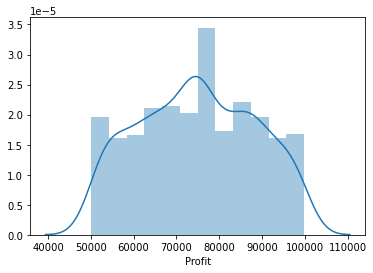

In [29]:
#visualizing the distribution of numerical data
sns.distplot(df['Profit'])

In [30]:
df.skew()

Profit    0.013196
dtype: float64

#### Null Value Treatment

In [31]:
df.Profit.isnull().sum()*100/len(df)

3.761467889908257

In [32]:
#only 3.76% of the values are missing hence imputing null values of Profit feature with mean 

In [33]:
df['Profit'].fillna((df['Profit'].mean()), inplace=True)

In [34]:
df.isnull().sum() #checking for null values..data is clean!

Gender                        0
Educational_Qualifications    0
Profit                        0
dtype: int64

# Question : Explain dimension reduction in machine learning.

Dimension reduction is a technique which is used to reduce the number of input dimensions.It basically means converting a high dimensional space to a low dimensional space.This reduction is done keeping in mind that most of the meaningful/vital information about the data is captured.

In machine learning lingo this is called as the curse of dimensionality which arises when we are dealing with large no.of dimensions.

For example in simpler term reducing the dimensions from 100 to 2 and at the same time capturing the necessary details about the data.This is basically done when the dataset has large no.of dimensions which is difficult to analyze and impossible to visualize by a human being.So these features are reduced into 2D and 1D form post which tey are easy to understand and intrepret.

There are different types of techniques for dimensionality reduction like:-
1.PCA
Principal component analysis (PCA) is a statistical technique that orthogonally transforms the original n numeric dimensions of a dataset into a new set of n dimensions called principal components

2.Forward & Backward Selection Selection
The forward consist of progressively adding one column at a time, i.e., the column that produces the highest increase in performance while the backward consist of removing one at a time whilst keeping the track of the performance.

I have implemented the above techniques using the libraries mentioned below
PCA-from sklearn.decomposition import PCA
Forward & Backward Selection-from mlxtend.feature_selection import SequentialFeatureSelector as sfs


**There are many other techniques like Independent Component Analysis,SVD,LDA etc which I have come across lately but have not implemented them till this point.

# Thank You!